In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

In [70]:
# function to load shapfiles in as a geopandas object
def load_shape_file(filepath):
    """Loads the shape file desired to mask a grid.
    Args:
        filepath: Path to *.shp file
    """
    shpfile = gpd.read_file(filepath)
    return shpfile

In [71]:
#RGV_ecoreg= Rio Grande Valley Ecoregions
RGV_ecoreg = load_shape_file('C:\Bridgett\Bridgett\Introduction to Scientific computing\Everything\RGV_Ecoregions\RGV_Ecoregions.shp')
RGV_ecoreg.head() # .head gives you the first few lines, aka shapes

,OBJECTID,Veg_ID,CommonName,LULC,Slope,Riparian,EcoClass_I,EcoName,MoRAP_ID,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,HUC12RNG,Shape_Leng,Shape_Area,geometry
0,1,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40311,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,380.00000,2700.0000,"POLYGON ((1653879 6904557, 1653869 6904557, 16..."
1,2,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40312,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,260.00000,1400.0000,"POLYGON ((1652969 6904537, 1652969 6904587, 16..."
2,3,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40375,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,291.84704,1682.2225,"POLYGON ((1655129 6903767.6097, 1655079 690377..."
3,4,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40447,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,1860.00000,36800.0000,"POLYGON ((1656909 6903857, 1656899 6903857, 16..."
4,5,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40472,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,160.00000,1300.0000,"POLYGON ((1656749 6903537, 1656749 6903517, 16..."


In [72]:
TMDT=[7004,7005]
TSG=[7103,7104,7105,7107]
TCT=[7204,7205,7207]
TF=[7402,7403,7404,7405,7406,7417,7407]
TR=[7602,7604,7605,7606,7607]
MNAMT=[9000,9007,9187,9600,9104,9106,9124,9107,9128,9116,9204]
AHRMT=[9304,9307,9410,9411,9317]
TCDW=[10004,10006,10017]
TSCP=[2206,2207]
TCSBTM=[5600,5605,5617,5606,5616]
RGDTWS=[7802,7804,7805]
TCB=[6100]
TCDCG=[6200,6306,6307]
SCPIW=[6507]
STSBTF=[6600,6610]
TL=[7305,7306,7307]
TPGRF=[7502]
TSL=[7700,7707]
TST=[6806]
CSTCFFW=[6402,6403,6405]
TCG=[6707]

In [73]:
df = []
Veg_ID = RGV_ecoreg['Veg_ID']

for i in Veg_ID:
    if i in TMDT:
        df.append('Tamaulipan Mixed Deciduous Thornscrub')
    elif i in TSG:
        df.append('Tamaulipan Savanna Grassland')
    elif i in TCT:
        df.append('Tamaulipan Calcareous Thornscrub')
    elif i in TF:
        df.append('Tamaulipan Floodplain')
    elif i in TR:
        df.append('Tamulipan Ramadero')
    elif i in MNAMT:
        df.append('Mainly Natural Azonal Mapped Types') 
    elif i in AHRMT:
        df.append('Agricultural and other Human-related Mapped Types')
    elif i in TCDW:
        df.append('Tamaulipan Closed Depression Wetland')
    elif i in TSCP:
        df.append('Texas Saline Coastal Prairie')
    elif i in TCSBTM:
        df.append('Texas Coast Salt and Brackish Tidal Marsh')
    elif i in RGDTWS:
        df.append('Rio Grande Delta Thorn Woodland and Shrubland')    
    elif i in TCB:
        df.append('Texas Coastal Beach')          
    elif i in TCDCG:
        df.append('Texas Coast Dune and Coastal Grassland') 
    elif i in SCPIW:
        df.append('Southeastern Coastal Plain Interdunal Wetland')        
    elif i in STSBTF:
        df.append('South Texas Salt and Brackish Tidal Flats')        
    elif i in TL:
        df.append('Tamaulipan Lomas')
    elif i in TPGRF:
        df.append('Tamaulipan Palm Grove Riparian Forest')
    elif i in TSL:
        df.append('Tamaulipan Saline Lake')        
    elif i in TST:
        df.append('Tamaulipan Saline Thornscrub')      
    elif i in CSTCFFW:
        df.append('Central and South Texas Coastal Fringe Forest and Woodland')
    elif i in TCG:
        df.append('Tamaulipan Caliche Grassland')
    else:
        break

RGV_ecoreg['Major_Ecoregion'] = df

In [74]:
df2 = []

for i in Veg_ID:
    if i in TMDT:
        df2.append(0)
    elif i in TSG:
        df2.append(1)
    elif i in TCT:
        df2.append(2)
    elif i in TF:
        df2.append(3)
    elif i in TR:
        df2.append(4)
    elif i in MNAMT:
        df2.append(5)
    elif i in AHRMT:
        df2.append(6)
    elif i in TCDW:
        df2.append(7)
    elif i in TSCP:
        df2.append(8)
    elif i in TCSBTM:
        df2.append(9)
    elif i in RGDTWS:
        df2.append(10)
    elif i in TCB:
        df2.append(11)
    elif i in TCDCG:
        df2.append(12)
    elif i in SCPIW:
        df2.append(13)
    elif i in STSBTF:
        df2.append(14)
    elif i in TL:
        df2.append(15)
    elif i in TPGRF:
        df2.append(16)
    elif i in TSL:
        df2.append(17)
    elif i in TST:
        df2.append(18)
    elif i in CSTCFFW:
        df2.append(19)
    elif i in TCG:
        df2.append(20)      
    else:
        break

RGV_ecoreg['Maj_ER'] = df2

In [75]:
df3=[]

for i in Veg_ID:
    if i == 7004:
        df3.append(0.1)
    elif i == 7005:
        df3.append(0.2)
    elif i == 7103:
        df3.append(1.1)
    elif i == 7104:
        df3.append(1.2)
    elif i == 7105:
        df3.append(1.3)
    elif i == 7107:
        df3.append(1.4)
    elif i == 7204:
        df3.append(2.1)
    elif i == 7205:
        df3.append(2.2)
    elif i == 7207:
        df3.append(2.3)
    elif i == 7402:
        df3.append(3.1)
    elif i == 7403:
        df3.append(3.2)
    elif i == 7404:
        df3.append(3.3)
    elif i == 7405:
        df3.append(3.4)
    elif i == 7406:
        df3.append(3.5)       
    elif i == 7602:
        df3.append(4.1)
    elif i == 7604:
        df3.append(4.2)
    elif i == 7605:
        df3.append(4.3)
    elif i == 7606:
        df3.append(4.4)
    elif i == 9000:
        df3.append(5.1)
    elif i == 9007:
        df3.append(5.2)
    elif i == 9104:
        df3.append(5.5)
    elif i == 9106:
        df3.append(5.6)
    elif i == 9124:
        df3.append(5.7)
    elif i == 9187:
        df3.append(5.3)
    elif i == 9304:
        df3.append(6.1)
    elif i == 9307:
        df3.append(6.2)
    elif i == 9410:
        df3.append(6.3)
    elif i == 9411:
        df3.append(6.4)
    elif i == 9600:
        df3.append(5.4)
    elif i == 10004:
        df3.append(7.1)
    elif i == 10006:
        df3.append(7.2)
    elif i == 10017:
        df3.append(7.3)
    elif i == 7417:
        df3.append(3.6)
    elif i == 2206:
        df3.append(8.1)   
    elif i == 2207:
        df3.append(8.2)
    elif i == 5600:
        df3.append(9.1)
    elif i == 5605:
        df3.append(9.2)
    elif i == 5617:
        df3.append(9.3)
    elif i == 6307:
        df3.append(12.3)
    elif i == 7407:
        df3.append(3.7)   
    elif i == 7802:
        df3.append(10.1)
    elif i == 7804:
        df3.append(10.2)
    elif i == 7805:
        df3.append(10.3)
    elif i == 9107:
        df3.append(5.8)
    elif i == 9128:
        df3.append(5.9)
    elif i == 9317:
        df3.append(6.5)
    elif i == 5606:
        df3.append(9.4)
    elif i == 5616:
        df3.append(9.5)
    elif i == 6100:
        df3.append(11.1)
    elif i == 6200:
        df3.append(12.1)
    elif i == 6306:
        df3.append(12.2)
    elif i == 6405:
        df3.append(19.3)
    elif i == 6507:
        df3.append(13.1)
    elif i == 6600:
        df3.append(14.1)
    elif i == 6610:
        df3.append(14.2)
    elif i == 7305:
        df3.append(15.1)
    elif i == 7306:
        df3.append(15.2)
    elif i == 7307:
        df3.append(15.3)
    elif i == 7502:
        df3.append(16.1)
    elif i == 7700:
        df3.append(17.1)
    elif i == 7707:
        df3.append(17.2)
    elif i == 9204:
        df3.append(5.11)
    elif i == 6806:
        df3.append(18.1)
    elif i == 7607:
        df3.append(4.5)
    elif i == 6402:
        df3.append(19.1)
    elif i == 6403:
        df3.append(19.2)
    elif i == 6707:
        df3.append(20.1)
    elif i == 9116:
        df3.append(5.01)
    else:
        break
        
RGV_ecoreg['Sub_ER'] = df3
RGV_ecoreg.tail(n=10)

,OBJECTID,Veg_ID,CommonName,LULC,Slope,Riparian,EcoClass_I,EcoName,MoRAP_ID,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,HUC12RNG,Shape_Leng,Shape_Area,geometry,Major_Ecoregion,Maj_ER,Sub_ER
268960,268961,9411,Urban Low Intensity,25,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080400,4804.657264,101363.203592,"POLYGON ((1684469 6920147.0001, 1684469 692013...",Agricultural and other Human-related Mapped Types,6,6.4
268961,268962,9411,Urban Low Intensity,25,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080400,508.719023,5808.285643,"POLYGON ((1684639 6925007, 1684639 6924997, 16...",Agricultural and other Human-related Mapped Types,6,6.4
268962,268963,5605,Coastal: Sea Ox-eye Daisy Flats,11,0,0,R150BY655TX,SANDY COASTAL FLAT PE 31-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080800,580.000000,13900.000000,"POLYGON ((1755440 6914483, 1755440 6914473, 17...",Texas Coast Salt and Brackish Tidal Marsh,9,9.2
268963,268964,5617,Coastal: Salt and Brackish High Tidal Marsh,27,0,0,R150BY652TX,SALT MARSH PE 31-44,0,34i,Laguna Madre Barrier Islands and Coastal Marshes,34,Western Gulf Coastal Plain,121102080800,4066.640179,179933.064918,"POLYGON ((1762070 6915313, 1762070 6915293, 17...",Texas Coast Salt and Brackish Tidal Marsh,9,9.3
268964,268965,6600,South Texas: Wind Tidal Flats,1,0,0,R150BY651TX,SALT FLAT PE 31-44,0,34i,Laguna Madre Barrier Islands and Coastal Marshes,34,Western Gulf Coastal Plain,121102080800,1692.414009,23079.569882,"POLYGON ((1758870 6914803.0001, 1758870 691479...",South Texas Salt and Brackish Tidal Flats,14,14.1
268965,268966,7107,South Texas: Sandy Mesquite Savanna Grassland,15,0,0,R083CY463TX,LOAMY SAND PE 19-31,0,34d,Coastal Sand Plain,34,Western Gulf Coastal Plain,121102070008,8715.483683,586649.222118,"(POLYGON ((1696421 6964752.4355, 1696389.86960...",Tamaulipan Savanna Grassland,1,1.4
268966,268967,9307,Row Crops,9,0,0,R083CY480TX,SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,859.361519,15110.197319,"POLYGON ((1705419 6914631.1078, 1705419 691462...",Agricultural and other Human-related Mapped Types,6,6.2
268967,268968,9307,Row Crops,9,0,0,R083DY504TX,LAKEBED PE 19-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,597.590022,10608.125938,"POLYGON ((1724270 6914509.9858, 1724270 691450...",Agricultural and other Human-related Mapped Types,6,6.2
268968,268969,9307,Row Crops,9,0,0,R150BY655TX,SANDY COASTAL FLAT PE 31-44,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,778.370095,35481.894865,"POLYGON ((1732782 6914658, 1732782 6914638, 17...",Agricultural and other Human-related Mapped Types,6,6.2
268969,268970,9600,Open Water,21,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,0,34e,Lower Rio Grande Valley,34,Western Gulf Coastal Plain,121102080300,3886.371293,328074.221869,"POLYGON ((1686069 6915037, 1686069 6915027, 16...",Mainly Natural Azonal Mapped Types,5,5.4


In [ ]:
#Now I am going to add the SERN = Sub Ecoregion Numbers

df3=[]

for i in Veg_ID:
    if i == 7004:
        df3.append(0.1)
    elif i == 7005:
        df3.append(0.2)
    elif i == 7103:
        df3.append(1.1)
    elif i == 7104:
        df3.append(1.2)
    elif i == 7105:
        df3.append(1.3)
    elif i == 7107:
        df3.append(1.4)
    elif i == 7204:
        df3.append(2.1)
    elif i == 7205:
        df3.append(2.2)
    elif i == 7207:
        df3.append(2.3)
    elif i == 7402:
        df3.append(3.1)
    elif i == 7403:
        df3.append(3.2)
    elif i == 7404:
        df3.append(3.3)
    elif i == 7405:
        df3.append(3.4)
    elif i == 7406:
        df3.append(3.5)       
    elif i == 7602:
        df3.append(4.1)
    elif i == 7604:
        df3.append(4.2)
    elif i == 7605:
        df3.append(4.3)
    elif i == 7606:
        df3.append(4.4)
    elif i == 9000:
        df3.append(5.1)
    elif i == 9007:
        df3.append(5.2)
    elif i == 9104:
        df3.append(5.5)
    elif i == 9106:
        df3.append(5.6)
    elif i == 9124:
        df3.append(5.7)
    elif i == 9187:
        df3.append(5.3)
    elif i == 9304:
        df3.append(6.1)
    elif i == 9307:
        df3.append(6.2)
    elif i == 9410:
        df3.append(6.3)
    elif i == 9411:
        df3.append(6.4)
    elif i == 9600:
        df3.append(5.4)
    elif i == 10004:
        df3.append(7.1)
    elif i == 10006:
        df3.append(7.2)
    elif i == 10017:
        df3.append(7.3)
    elif i == 7417:
        df3.append(3.6)
    elif i == 2206:
        df3.append(8.1)   
    elif i == 2207:
        df3.append(8.2)
    elif i == 5600:
        df3.append(9.1)
    elif i == 5605:
        df3.append(9.2)
    elif i == 5617:
        df3.append(9.3)
    elif i == 6307:
        df3.append(10.3)
    elif i == 7407:
        df3.append(3.7)   
    elif i == 7802:
        df3.append(11.1)
    elif i == 7804:
        df3.append(11.2)
    elif i == 7805:
        df3.append(11.3)
    elif i == 9107:
        df3.append(5.8)
    elif i == 9128:
        df3.append(5.9)
    elif i == 9317:
        df3.append(6.5)
    elif i == 5606:
        df3.append(9.4)
    elif i == 5616:
        df3.append(9.5)
    elif i == 6100:
        df3.append(12.1)
    elif i == 6200:
        df3.append(10.1)
    elif i == 6306:
        df3.append(10.2)
    elif i == 6405:
        df3.append(13.3)
    elif i == 6507:
        df3.append(14.1)
    elif i == 6600:
        df3.append(15.1)
    elif i == 6610:
        df3.append(15.2)
    elif i == 7305:
        df3.append(16.1)
    elif i == 7306:
        df3.append(16.2)
    elif i == 7307:
        df3.append(16.3)
    elif i == 7502:
        df3.append(17.1)
    elif i == 7700:
        df3.append(18.1)
    elif i == 7707:
        df3.append(18.2)
    elif i == 9204:
        df3.append(5.11)
    elif i == 6806:
        df3.append(19.1)
    elif i == 7607:
        df3.append(4.5)
    elif i == 6402:
        df3.append(13.1)
    elif i == 6403:
        df3.append(13.2)
    elif i == 6707:
        df3.append(20.1)
    elif i == 9116:
        df3.append(5.01) #I tried to put 5.10 but it registered as 5.1
    else:
        break
        
RGV_ecoreg['SERN'] = df3
RGV_ecoreg.tail(n=10)

In [76]:
sum = 0
Maj_ER_Areas=[]

for MERn in np.arange(0,21):
    temp_sum = np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Maj_ER == MERn])
    print(temp_sum)
    Maj_ER_Areas.append(temp_sum)
    sum = sum + temp_sum
    
print(sum)

618710590.5234846
2467283634.0686307
442216593.60378927
202253842.6212593
176501205.71520394
1821777320.1111965
3570055490.8441744
14993065.930600151
535730598.01641876
259509859.10961932
23215181.89602481
1637675.184440527
727464989.6193082
8874321.72110065
376455038.98037183
68358006.63592342
649159.5606464
13775125.11699649
159185608.99921954
107548892.23097286
16259767.161396649
11612455967.650776


In [77]:
Maj_ER_TArea=np.sum(Maj_ER_Areas)


In [78]:
Total_Percent=0
Maj_ER_Percent_Area=[]

for Area in Maj_ER_Areas:
    Percent=(Area/Maj_ER_TArea)*100
    print(Percent)
    Maj_ER_Percent_Area.append(Percent)
    Total_Percent=Total_Percent+Percent
    
print(Total_Percent)

5.3279908423080204
21.246871815418107
3.808122888350987
1.7416973910143116
1.5199300320870066
15.688131134242274
30.74332854987268
0.12911192922812245
4.6134133856681325
2.2347543003180808
0.19991621032360557
0.014102746128834899
6.264523126251956
0.07642071363561816
3.2418210241578165
0.5886610621073673
0.005590200405967406
0.11862370161290892
1.3708177619158983
0.926151130566829
0.1400200543854982
100.00000000000001


In [79]:
Sub_ER=[0.1,0.2,1.1,1.2,1.3,1.4,2.1,2.2,2.3,3.1,3.2,3.3,3.4,3.5,4.1,4.2,4.3,4.4,5.1,5.2,5.5,5.6,5.7,5.3,6.1,6.2,6.3,6.4,5.4,7.1,7.2,7.3,3.6,8.1,8.2,9.1,9.2,9.3,12.3,3.7,10.1,10.2,10.3,5.8,5.9,6.5,9.4,9.5,11.1,12.1,12.2,19.3,13.1,14.1,14.2,15.1,15.2,15.3,16.1,17.1,17.2,5.11,18.1,4.5,19.1,19.2,20.1,5.01]

In [80]:
Sub_ER_TArea = 0
Sub_ER_Areas=[]

for SERn in Sub_ER:
    temp_sum1 = np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == SERn])
    print(temp_sum1)
    Sub_ER_Areas.append(temp_sum1)
    Sub_ER_TArea = Sub_ER_TArea + temp_sum1
    
print(Sub_ER_TArea)

403117081.3414676
215593509.18201685
90453376.2872941
1451511090.706595
262844126.88390356
662475040.1908376
331105032.5033702
71812425.28822668
39299135.81219241
57941271.329609394
10801429.84033888
54308250.664430484
12082469.646661151
46343499.59138941
21365115.777789153
64622047.11597763
14428014.55157777
76081628.26985942
45532567.217426434
22858092.339831553
2451315.16967957
2995576.2906827303
1497806.64140375
1569646004.4830456
26439743.637667872
2635799088.4889517
163497873.96353918
736733125.5420476
172256020.67993057
9022668.26594094
5922097.66465921
48300.0
18702658.01257751
14454218.17770271
521276379.83871603
26455755.91901072
140545330.43316013
86791434.58744286
714577943.7051466
2074263.53625248
21875898.00994634
1205899.17410209
133384.71197638
1540955.32210895
1084280.45046937
7585659.21196878
1228304.0036185689
4489034.166387061
1637675.184440527
12802650.203404143
84395.71075781
40823413.20326358
8874321.72110065
321225613.42347133
55229425.55690051
54476955.76658426

In [81]:
Total_Percent1=0
Sub_ER_Percent_Area=[]

for Area in Sub_ER_Areas:
    Percent1=(Area/Sub_ER_TArea)*100
    print(Percent1)
    Sub_ER_Percent_Area.append(Percent1)
    Total_Percent1=Total_Percent1+Percent1
    
print(Total_Percent1)

3.4714196761171343
1.8565711661908826
0.7789340733715003
12.499604689568852
2.263467156440614
5.704865896037127
2.851292038701726
0.6184085906398873
0.33842225900937206
0.49895794215296396
0.09301589491860116
0.467672392607721
0.1040474958985395
0.3990843945543483
0.18398447182324473
0.556489060505353
0.12424602161481074
0.6551725877954038
0.39210109682454836
0.19684115404620803
0.0211093602981857
0.02579623379436366
0.012898276174964552
13.516916738850615
0.22768433922438092
22.698033007243154
1.4079525848709422
6.34433514834752
1.4833728641020478
0.07769819141683462
0.05099780512543255
0.00041593268585517977
0.16105686914704476
0.12447167264158696
4.488941713026543
0.2278222280688033
1.2102980698026506
0.7473994719912889
6.153547067870663
0.01786240173509228
0.1883830437840779
0.010384531725772781
0.001148634813754768
0.013269848569515718
0.009337219047287564
0.06532347018667208
0.010577469632955316
0.03865706082238174
0.014102746128834893
0.11024928954795547
0.0007267688333364968
0.

In [14]:
np.array(Sub_ER_Percent_Area)

array([3.47141968e+00, 1.85657117e+00, 7.78934073e-01, 1.24996047e+01,
       2.26346716e+00, 5.70486590e+00, 2.85129204e+00, 6.18408591e-01,
       3.38422259e-01, 4.98957942e-01, 9.30158949e-02, 4.67672393e-01,
       1.04047496e-01, 3.99084395e-01, 1.83984472e-01, 5.56489061e-01,
       1.24246022e-01, 6.55172588e-01, 3.92101097e-01, 1.96841154e-01,
       2.11093603e-02, 2.57962338e-02, 1.28982762e-02, 1.35169167e+01,
       2.27684339e-01, 2.26980330e+01, 1.40795258e+00, 6.34433515e+00,
       1.48337286e+00, 7.76981914e-02, 5.09978051e-02, 4.15932686e-04,
       1.61056869e-01, 1.24471673e-01, 4.48894171e+00, 2.27822228e-01,
       1.21029807e+00, 7.47399472e-01, 6.15354707e+00, 1.78624017e-02,
       1.88383044e-01, 1.03845317e-02, 1.14863481e-03, 1.32698486e-02,
       9.33721905e-03, 6.53234702e-02, 1.05774696e-02, 3.86570608e-02,
       1.41027461e-02, 1.10249290e-01, 7.26768833e-04, 3.51548487e-01,
       7.64207136e-02, 2.76621599e+00, 4.75605037e-01, 4.69125187e-01,
      

In [15]:
np.array(Maj_ER_Percent_Area)

array([5.32799084e+00, 2.12468718e+01, 3.80812289e+00, 1.74169739e+00,
       1.51993003e+00, 1.56881311e+01, 3.07433285e+01, 1.29111929e-01,
       4.61341339e+00, 2.23475430e+00, 1.99916210e-01, 1.41027461e-02,
       6.26452313e+00, 7.64207136e-02, 3.24182102e+00, 5.88661062e-01,
       5.59020041e-03, 1.18623702e-01, 1.37081776e+00, 9.26151131e-01,
       1.40020054e-01])

In [16]:
Maj_ER=np.arange(0,21)

In [32]:
# Libraries
import matplotlib.pyplot as plt
 
# Assign data: I have 20 groups and 68 subgroups
group_names=Maj_ER
group_size=Maj_ER_Percent_Area
subgroup_names=Sub_ER
subgroup_size=Sub_ER_Percent_Area
 
# Create colors
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Greys, plt.cm.Purples, plt.cm.Oranges, plt.cm.pink, plt.cm.YlOrBr, plt.cm.YlOrRd, plt.cm.OrRd, plt.cm.PuRd, plt.cm.RdPu, plt.cm.BuPu, plt.cm.GnBu, plt.cm.PuBu, plt.cm.YlGnBu, plt.cm.PuBuGn, plt.cm.BuGn, plt.cm.YlGn, plt.cm.cool]
explode = np.array(0.05,0.05)
 
    
    
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=6, labels=group_names,explode=explode, labeldistance=.975, colors=[a(0.9), b(0.9), c(0.9), d(0.9),e(0.9),f(0.9),g(0.9),h(0.9),i(0.9),j(0.9),k(0.9),l(0.9),m(0.9),n(0.9),o(0.9),p(0.9),q(0.9),r(0.9),s(0.9),t(0.9)])
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=5.7, labels=subgroup_names, labeldistance=.95, colors=[a(0.5), a(0.4), b(0.6), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2),d(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

TypeError: data type not understood

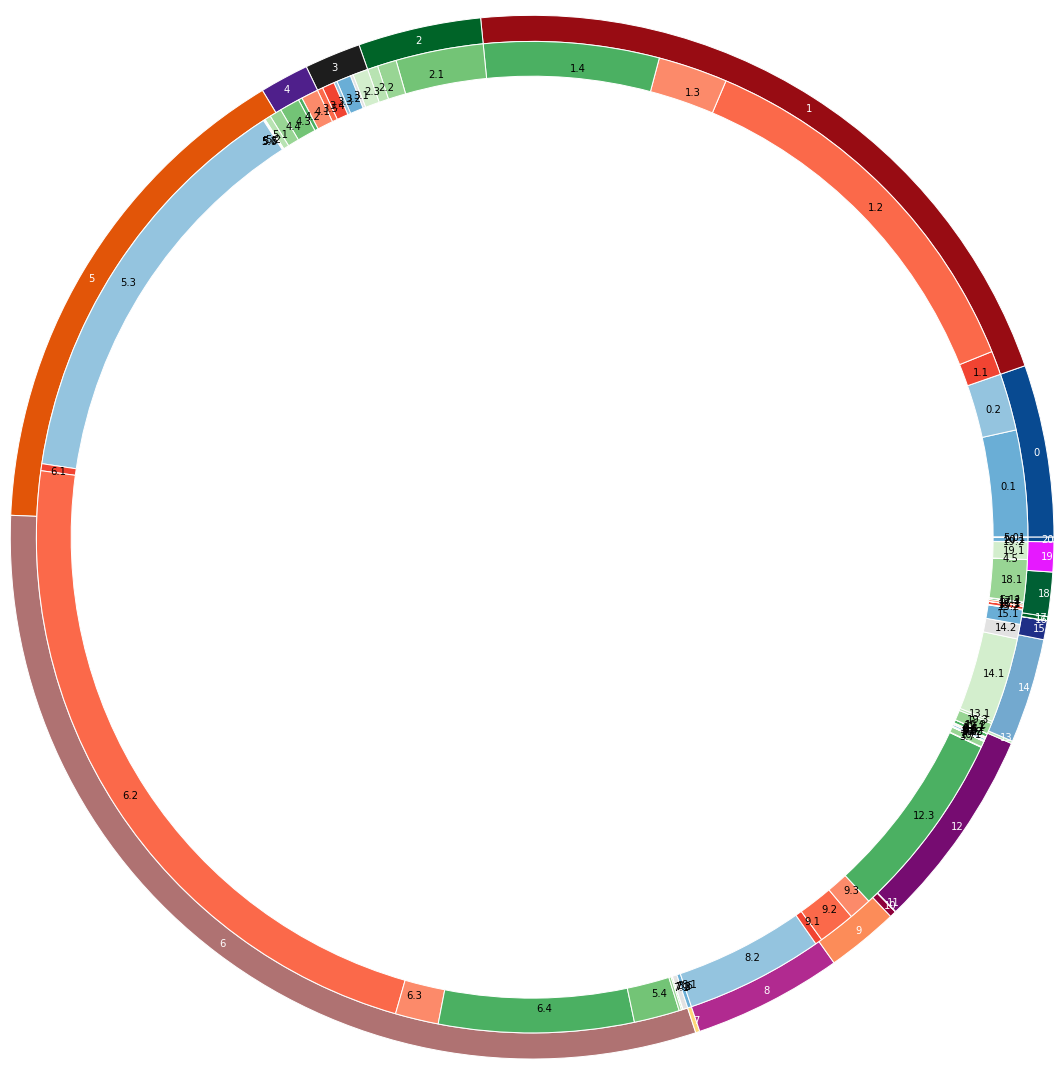

In [49]:
# Libraries
import matplotlib.pyplot as plt
 
# Assign data: I have 20 groups and 68 subgroups
group_names=Maj_ER
group_size=Maj_ER_Percent_Area
subgroup_names=Sub_ER
subgroup_size=Sub_ER_Percent_Area
 
# Create colors
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Greys, plt.cm.Purples, plt.cm.Oranges, plt.cm.pink, plt.cm.YlOrBr, plt.cm.plasma, plt.cm.OrRd, plt.cm.PuRd, plt.cm.RdPu, plt.cm.BuPu, plt.cm.GnBu, plt.cm.PuBu, plt.cm.YlGnBu, plt.cm.PuBuGn, plt.cm.BuGn, plt.cm.YlGn, plt.cm.cool]
explode =5   
    
    
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=6,textprops=dict(color="w"), labels=group_names, labeldistance=.975, colors=[a(0.9), b(0.9), c(0.9), d(0.9),e(0.9),f(0.7),g(0.3),h(0.3),i(0.4),j(0.5),k(0.9),l(0.9),m(0.9),n(0.3),o(0.5),p(0.9),q(0.9),r(0.9),s(0.9),t(0.9)] )
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=5.7, labels=subgroup_names, labeldistance=.95, colors=[a(0.5), a(0.4), b(0.6), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2),d(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

In [59]:
#Sum of sub ecoregions for major eco region 3
np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 3.1])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 3.2])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 3.3])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 3.4])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 3.5])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 3.6])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 3.7])

202253842.6212593

In [60]:
np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Maj_ER == 3])

202253842.6212593

The sub ecoregion areas are equivalent to the major ecoregion 3 area

In [61]:
(np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 4.1]))+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 4.2])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 4.3])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 4.4])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 4.5])

176501205.715204

In [63]:
np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Maj_ER == 4])

176501205.71520394

The sub ecoregion areas are equivalent to the major ecoregion 4 area

In [ ]:
(np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 5.1]))+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 5.2])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 5.3])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 5.4])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 5.5])+np.sum(RGV_ecoreg.Shape_Area[RGV_ecoreg.Sub_ER == 5.5])

TypeError: 'list' object is not callable

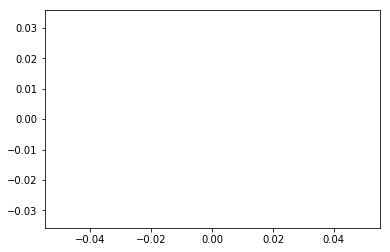

In [52]:
# Libraries
import matplotlib.pyplot as plt
 
# Assign data: I have 20 groups and 68 subgroups
group_names=Maj_ER
group_size=Maj_ER_Percent_Area
subgroup_names=Sub_ER
subgroup_size=Sub_ER_Percent_Area
 
# Create colors
a=[plt.cm.tab20]
    
    
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=6,textprops=dict(color="w"), labels=group_names, labeldistance=.975, colors=[a(1), a(2), a(3), a(4),a(5),a(6),a(7),a(8),a(9),a(10),a(11),a(12),a(13),a(14),a(15),a(16),a(17),a(18),a(19),a(20)] )
plt.setp( mypie, width=0.3, edgecolor='white')

# show it
plt.show()

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [3.4714196761171343,1.8565711661908826]
bars2 = [0.7789340733715003, 12.499604689568852, 2.263467156440614,5.704865896037127]
bars3 = [2.851292038701726, 0.6184085906398873, 0.33842225900937206]
bars4 = [0.49895794215296396, 0.09301589491860116, 0.467672392607721, 0.1040474958985395, 0.3990843945543483, 0.18398447182324473, 0.556489060505353]
bars5 = [0.12424602161481074, 0.6551725877954038, 0.39210109682454836, 0.19684115404620803, 0.0211093602981857]
bars6 = [0.02579623379436366, 0.012898276174964552, 13.516916738850615, 0.22768433922438092, 22.698033007243154, 1.4079525848709422, 6.34433514834752, 1.4833728641020478, 0.07769819141683462, 0.05099780512543255, 0.00041593268585517977]



# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
    
    
    
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

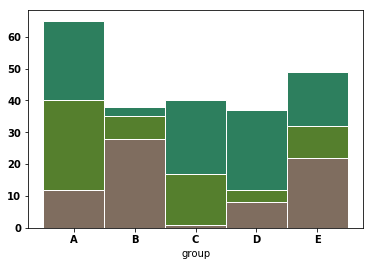

In [57]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

In [ ]:
Total_Percent1=0

for MERn in Maj_ER_Percent_Are:
    Percent=(Area/Maj_ER_TArea)*100
    print(Percent)
    Maj_ER_Percent_Area.append(Percent)
    Total_Percent=Total_Percent+Percent
  
print(Total_Percent1)

In [65]:
for i in Maj_ER_Percent_Area: # assuming the lists are of the same length
    if Maj_ER_Percent_Area[i]==Sub_ER_Percent_Area[i]:
                print('Same')

TypeError: list indices must be integers or slices, not numpy.float64

In [ ]:
>>> x.astype(int)

In [66]:
x1=Maj_ER_Percent_Area.astype(int)

AttributeError: 'list' object has no attribute 'astype'

In [ ]:
x2=Sub_ER_Percent_Area.astype(int)

In [68]:
for i in Maj_ER_Percent_Area:
        if Maj_ER_Percent_Area[i] == Sub_ER_Percent_Area[i]:
             print('yes')
        else:
            print('no')

TypeError: list indices must be integers or slices, not numpy.float64

In [86]:
Maj_ER_Percent_Area.np.plot(kind='barh')

AttributeError: 'list' object has no attribute 'np'

In [ ]:
x = RGV_ecoreg.groupby('Major_Ecoregion')['Shape_Area'].mean().sort_values().tail(15)

In [87]:
RGV_ecoreg

,OBJECTID,Veg_ID,CommonName,LULC,Slope,Riparian,EcoClass_I,EcoName,MoRAP_ID,US_L4CODE,US_L4NAME,US_L3CODE,US_L3NAME,HUC12RNG,Shape_Leng,Shape_Area,geometry,Major_Ecoregion,Maj_ER,Sub_ER
0,1,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40311,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,380.000000,2700.000000,"POLYGON ((1653879 6904557, 1653869 6904557, 16...",Tamaulipan Mixed Deciduous Thornscrub,0,0.1
1,2,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40312,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,260.000000,1400.000000,"POLYGON ((1652969 6904537, 1652969 6904587, 16...",Tamaulipan Mixed Deciduous Thornscrub,0,0.1
2,3,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40375,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,291.847040,1682.222500,"POLYGON ((1655129 6903767.6097, 1655079 690377...",Tamaulipan Mixed Deciduous Thornscrub,0,0.1
3,4,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40447,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,1860.000000,36800.000000,"POLYGON ((1656909 6903857, 1656899 6903857, 16...",Tamaulipan Mixed Deciduous Thornscrub,0,0.1
4,5,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40472,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,160.000000,1300.000000,"POLYGON ((1656749 6903537, 1656749 6903517, 16...",Tamaulipan Mixed Deciduous Thornscrub,0,0.1
5,6,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40472,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,697.369784,8391.792000,"POLYGON ((1656519 6903587, 1656519 6903547, 16...",Tamaulipan Mixed Deciduous Thornscrub,0,0.1
6,7,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40472,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,2203.466046,80803.233499,"POLYGON ((1657249 6903677, 1657249 6903647, 16...",Tamaulipan Mixed Deciduous Thornscrub,0,0.1
7,8,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40487,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,168.410109,1402.812584,"POLYGON ((1656789 6903422.6458, 1656732.875300...",Tamaulipan Mixed Deciduous Thornscrub,0,0.1
8,9,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40487,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,396.243836,1958.227567,"POLYGON ((1657396.7973 6903487, 1657396.1008 6...",Tamaulipan Mixed Deciduous Thornscrub,0,0.1
9,10,7004,South Texas: Clayey Mesquite Mixed Shrubland,5,0,0,R083DY501TX,GRAY SANDY LOAM PE 19-31,40487,31c,Texas-Tamaulipan Thornscrub,31,Southern Texas Plains,121102080100,761.168011,11257.778388,"POLYGON ((1657059.004799999 6903498.7723, 1657...",Tamaulipan Mixed Deciduous Thornscrub,0,0.1


In [91]:
Major_ecoreg=RGV_ecoreg['Major_Ecoregion'].unique()

In [119]:
Sub_ecoreg=RGV_ecoreg['Veg_ID'].unique()

In [101]:
Major_Ecoregions=pd.DataFrame(data=Major_ecoreg)

In [120]:
Sub_Ecoregions=pd.DataFrame(data=Sub_ecoreg)

In [102]:
Major_Ecoregions

,0
0,Tamaulipan Mixed Deciduous Thornscrub
1,Tamaulipan Savanna Grassland
2,Tamaulipan Calcareous Thornscrub
3,Tamaulipan Floodplain
4,Tamulipan Ramadero
5,Mainly Natural Azonal Mapped Types
6,Agricultural and other Human-related Mapped Types
7,Tamaulipan Closed Depression Wetland
8,Texas Saline Coastal Prairie
9,Texas Coast Salt and Brackish Tidal Marsh


In [121]:
Sub_Ecoregions

,0
0,7004
1,7005
2,7103
3,7104
4,7105
5,7107
6,7204
7,7205
8,7207
9,7402


In [125]:
Major_Ecoregions['Major_ecoreg_percent_area'] = Maj_ER_Percent_Area


In [126]:
Sub_Ecoregions['Sub_ecoreg_percent_area'] = Sub_ER_Percent_Area

In [129]:
Major_Ecoregions['Major_ecoreg_area'] = Maj_ER_Areas


In [130]:
Sub_Ecoregions['Sub_ecoreg_area'] = Sub_ER_Areas


In [131]:
Major_Ecoregions

,0,Major_ecoreg_area,Major_ecoreg_percent_area
0,Tamaulipan Mixed Deciduous Thornscrub,6.187106e+08,5.327991
1,Tamaulipan Savanna Grassland,2.467284e+09,21.246872
2,Tamaulipan Calcareous Thornscrub,4.422166e+08,3.808123
3,Tamaulipan Floodplain,2.022538e+08,1.741697
4,Tamulipan Ramadero,1.765012e+08,1.519930
5,Mainly Natural Azonal Mapped Types,1.821777e+09,15.688131
6,Agricultural and other Human-related Mapped Types,3.570055e+09,30.743329
7,Tamaulipan Closed Depression Wetland,1.499307e+07,0.129112
8,Texas Saline Coastal Prairie,5.357306e+08,4.613413
9,Texas Coast Salt and Brackish Tidal Marsh,2.595099e+08,2.234754


In [132]:
Sub_Ecoregions

,0,Sub_ecoreg_area,Sub_ecoreg_percent_area
0,7004,4.031171e+08,3.471420
1,7005,2.155935e+08,1.856571
2,7103,9.045338e+07,0.778934
3,7104,1.451511e+09,12.499605
4,7105,2.628441e+08,2.263467
5,7107,6.624750e+08,5.704866
6,7204,3.311050e+08,2.851292
7,7205,7.181243e+07,0.618409
8,7207,3.929914e+07,0.338422
9,7402,5.794127e+07,0.498958


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

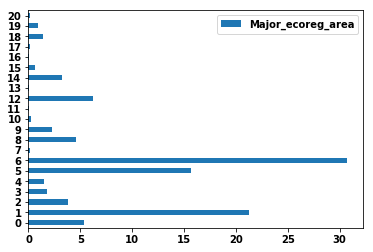

In [108]:
Major_Ecoregions.plot(kind='barh')

C:\Users\Bridgett\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


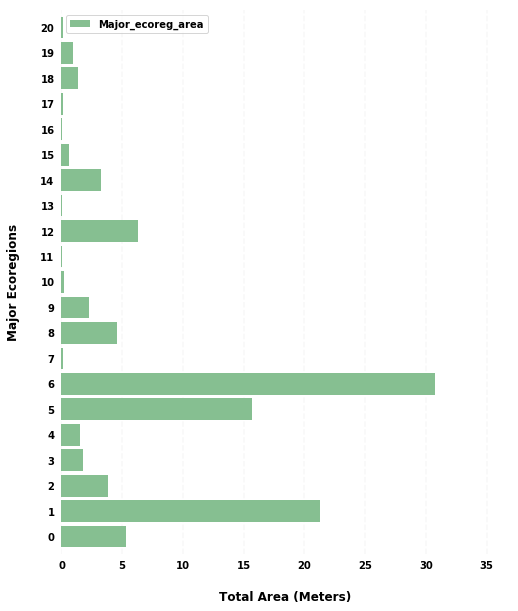

In [111]:
ax = Major_Ecoregions.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel("Total Area (Meters)", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Major Ecoregions", labelpad=20, weight='bold', size=12)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [134]:
Major_Ecoregions.to_excel("Major_Ecoregions.xlsx")

In [135]:
Sub_Ecoregions.to_excel("Sub_Ecoregions.xlsx")

In [136]:
Major_Ecoregions.to_excel('Desktop/Major_Ecoregions.xlsx')

In [137]:
Sub_Ecoregions.to_excel('Desktop/Sub_Ecoregions.xlsx')